In [2]:
# Bibliotecas utilizadas
import pandas as pd
import random
import time
import numpy as np
import pnd_io3
import matplotlib.pyplot as plt

In [1]:
!pip install openpyxl pandas np matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for np: filename=np-1.0.2-py3-none-any.whl size=13657 sha256=2be55c7a4fb392b4a56a315c38c31e217c4ae436de25b294f94471bced95600f
  Stored in directory: /root/.cache/pip/wheels/19/20/42/6ee214e617f78123903f603524d662ac6fa14154c3027fd992
Successfully built np


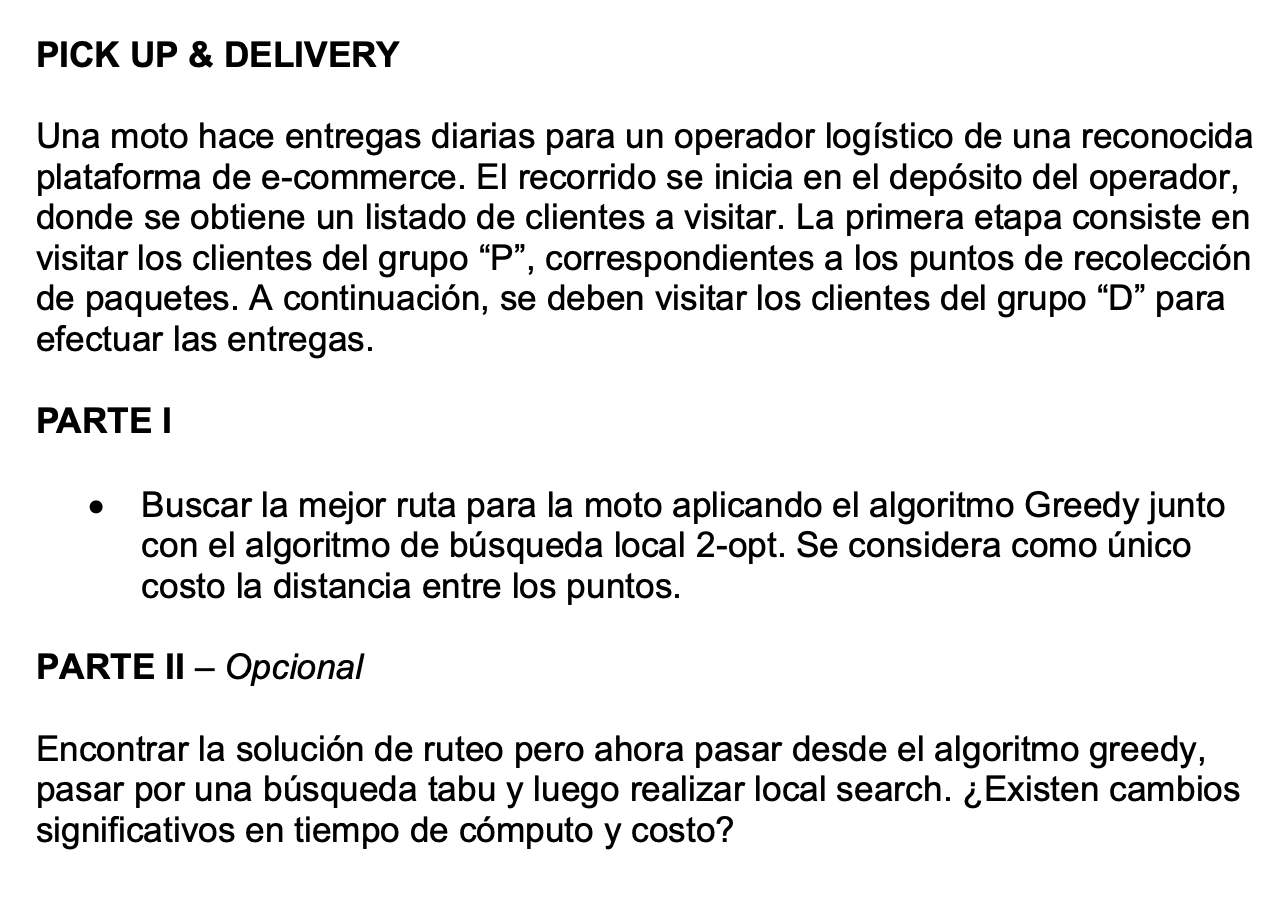

### **DATOS**

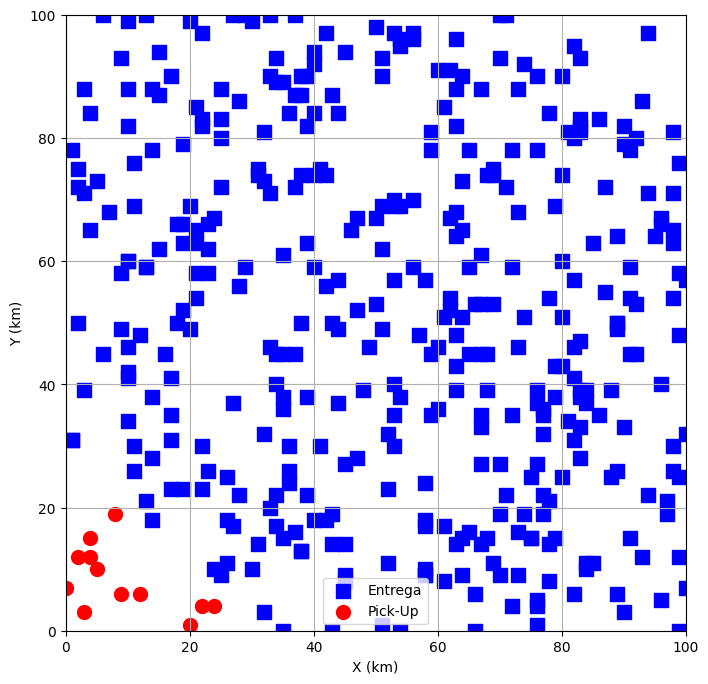

In [3]:
excel = pd.read_excel("P-C13-1C2025_dataset.xlsx", sheet_name='clientes')

# Separar los datasets A y B según la columna 'Grupo'
dataset_a = list(zip(excel[excel['Grupo'] == 'P']['X'], excel[excel['Grupo'] == 'P']['Y']))
dataset_b = list(zip(excel[excel['Grupo'] == 'D']['X'], excel[excel['Grupo'] == 'D']['Y']))
plt.figure(figsize=(8, 8))
# Puntos de A (cuadrados azules)
plt.scatter([p[0] for p in dataset_b], [p[1] for p in dataset_b], c='blue', label='Entrega', marker='s', s=100)
# Puntos de B (círculos rojos)
plt.scatter([p[0] for p in dataset_a], [p[1] for p in dataset_a], c='red', label='Pick-Up', marker='o', s=100)

plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.legend()
plt.grid(True)
plt.axis([0, 100, 0, 100])
plt.show()


### **MODELO**

In [4]:
PND = pnd_io3.PND(dataset_a, dataset_b, pos_init=(20, 30))  # El local se encuentra en X=20, Y=30

Greedy - Costo: 1961.53 km, Tiempo: 0.0584 seg


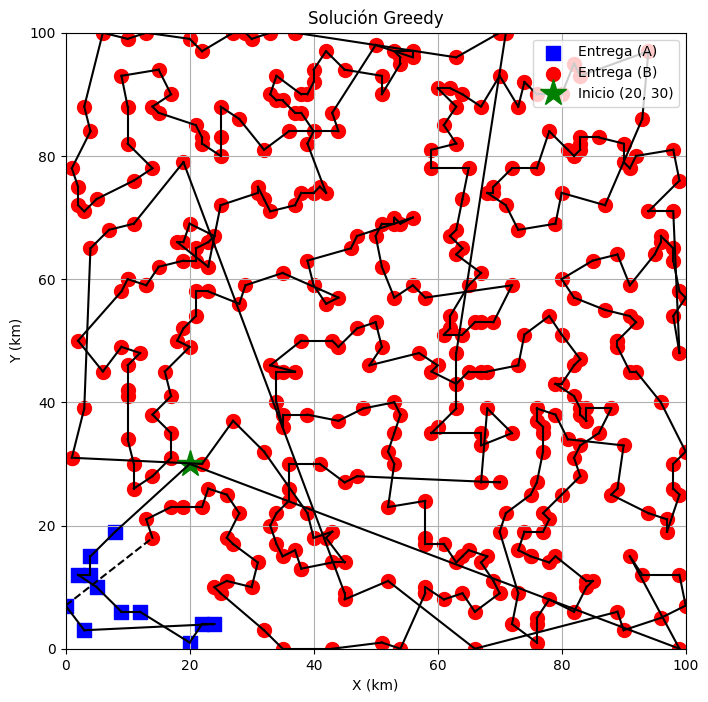

In [5]:
# Generar solución inicial con greedy
start_time = time.time()
ruta_a, ruta_b, costo_greedy = PND.greedy()
tiempo = time.time() - start_time
print(f"Greedy - Costo: {costo_greedy:.2f} km, Tiempo: {tiempo:.4f} seg")
PND.visualizar(ruta_a, ruta_b, "Solución Greedy")

LS-2OPT - Costo: 1657.57 km, Tiempo: 54.0177 seg


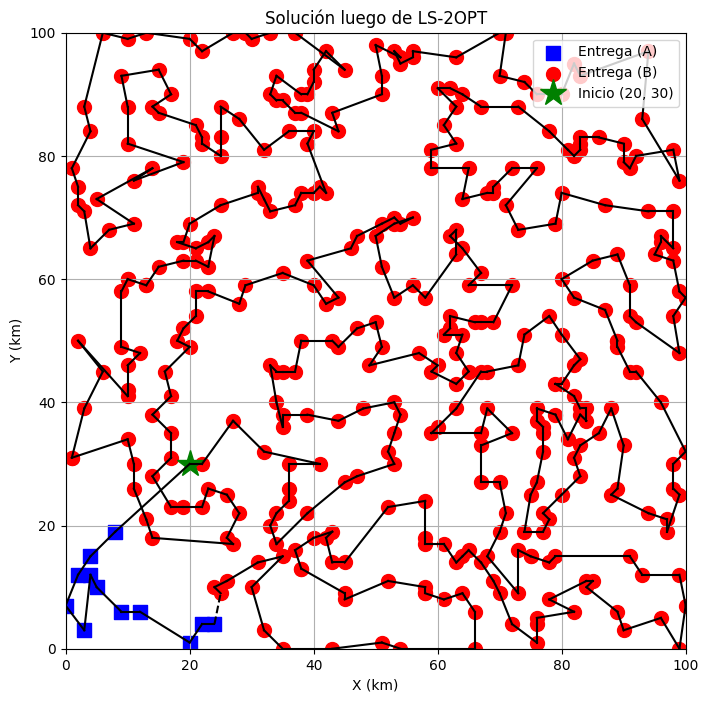

In [6]:
# Búsqueda local 2-opt para mejorar la ruta
start_time = time.time()
mejor_ruta_a = ruta_a[:]
mejor_ruta_b = ruta_b[:]
mejor_costo = PND.costo(mejor_ruta_a, mejor_ruta_b)
mejora = True

while mejora:
    mejora = False
    # Mejorar ruta_a
    for i in range(len(mejor_ruta_a) - 1):
        for j in range(i + 2, len(mejor_ruta_a)):
            nueva_ruta_a = mejor_ruta_a[:i] + mejor_ruta_a[i:j + 1][::-1] + mejor_ruta_a[j + 1:]
            nuevo_costo = PND.costo(nueva_ruta_a, mejor_ruta_b)
            if nuevo_costo < mejor_costo:
                mejor_ruta_a = nueva_ruta_a[:]
                mejor_costo = nuevo_costo
                mejora = True
    # Mejorar ruta_b
    for i in range(len(mejor_ruta_b) - 1):
        for j in range(i + 2, len(mejor_ruta_b)):
            nueva_ruta_b = mejor_ruta_b[:i] + mejor_ruta_b[i:j + 1][::-1] + mejor_ruta_b[j + 1:]
            nuevo_costo = PND.costo(mejor_ruta_a, nueva_ruta_b)
            if nuevo_costo < mejor_costo:
                mejor_ruta_b = nueva_ruta_b[:]
                mejor_costo = nuevo_costo
                mejora = True

tiempo = time.time() - start_time
print(f"LS-2OPT - Costo: {mejor_costo:.2f} km, Tiempo: {tiempo:.4f} seg")
PND.visualizar(mejor_ruta_a, mejor_ruta_b, "Solución luego de LS-2OPT")


### **PARTE II** - Opcional

In [9]:
PND_2 = pnd_io3.PND(dataset_a, dataset_b, pos_init=(20, 30))  # El local se encuentra en X=20, Y=30

Tabu Search - Costo: 1762.99 km, Tiempo: 59.1935 seg


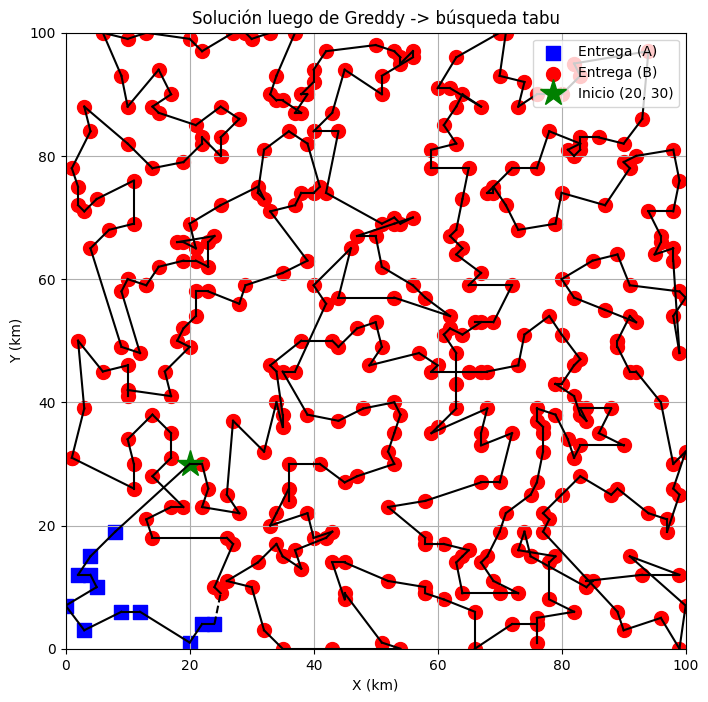

In [10]:
# Búsqueda Tabu para mejorar la solución obtenida por Greedy
start_time = time.time()
mejor_ruta_a_tabu, mejor_ruta_b_tabu, mejor_costo_tabu = PND_2.tabu(ruta_a, ruta_b, max_iter=1000, tabu_movi=10)
tiempo = time.time() - start_time
print(f"Tabu Search - Costo: {mejor_costo_tabu:.2f} km, Tiempo: {tiempo:.4f} seg")
PND.visualizar(mejor_ruta_a_tabu, mejor_ruta_b_tabu, "Solución luego de Greddy -> búsqueda tabu")

Greedy -> Tabu -> LS-2OPT - Costo: 1669.28 km, Tiempo: 42.2426 seg


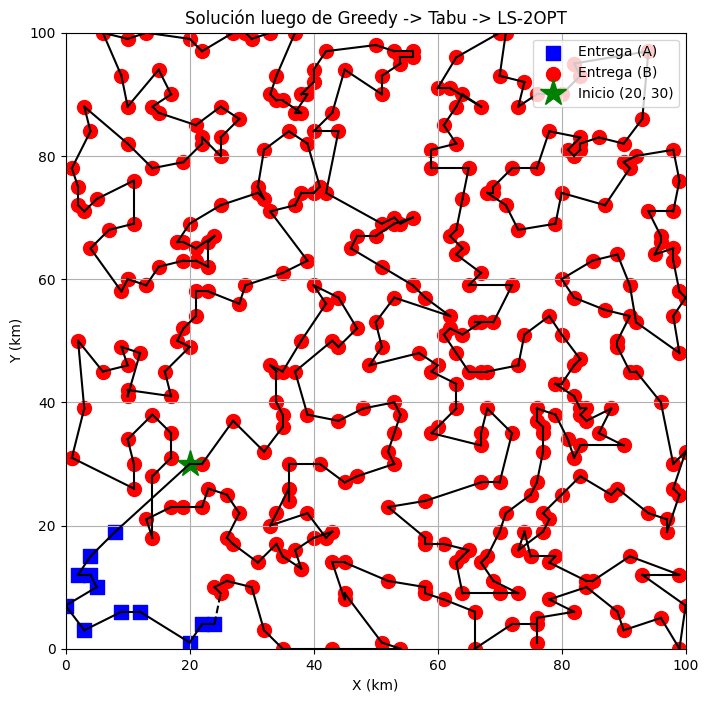

In [11]:
# Búsqueda local 2-opt para mejorar la ruta
start_time = time.time()
mejor_ruta_a = mejor_ruta_a_tabu[:]
mejor_ruta_b = mejor_ruta_b_tabu[:]
mejor_costo = PND_2.costo(mejor_ruta_a, mejor_ruta_b)
mejora = True

while mejora:
    mejora = False
    # Mejorar ruta_a
    for i in range(len(mejor_ruta_a) - 1):
        for j in range(i + 2, len(mejor_ruta_a)):
            nueva_ruta_a = mejor_ruta_a[:i] + mejor_ruta_a[i:j + 1][::-1] + mejor_ruta_a[j + 1:]
            nuevo_costo = PND_2.costo(nueva_ruta_a, mejor_ruta_b)
            if nuevo_costo < mejor_costo:
                mejor_ruta_a = nueva_ruta_a[:]
                mejor_costo = nuevo_costo
                mejora = True
    # Mejorar ruta_b
    for i in range(len(mejor_ruta_b) - 1):
        for j in range(i + 2, len(mejor_ruta_b)):
            nueva_ruta_b = mejor_ruta_b[:i] + mejor_ruta_b[i:j + 1][::-1] + mejor_ruta_b[j + 1:]
            nuevo_costo = PND_2.costo(mejor_ruta_a, nueva_ruta_b)
            if nuevo_costo < mejor_costo:
                mejor_ruta_b = nueva_ruta_b[:]
                mejor_costo = nuevo_costo
                mejora = True

tiempo = time.time() - start_time
print(f"Greedy -> Tabu -> LS-2OPT - Costo: {mejor_costo:.2f} km, Tiempo: {tiempo:.4f} seg")
PND_2.visualizar(mejor_ruta_a, mejor_ruta_b, "Solución luego de Greedy -> Tabu -> LS-2OPT")